# Risk and return
Modern Portfolio Theory on a Financial Portofolio of 5 companies with stock prices for the period 2015 - 2019 


In [48]:
import numpy as np
import pandas as pd

In [49]:

df = pd.read_csv("portfolio.csv")
df.head(2)


,date,AAPL,AMZN,FB,GOOG,NFLX
0,2015-01-02,101.1385,308.52,78.45,524.81,49.8485
1,2015-01-05,98.2893,302.19,77.19,513.87,47.3114


In [50]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'], inplace = True)

In [51]:
#df=df.set_index('date')
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2015-01-02,101.1385,308.52,78.450,524.81,49.8485
2015-01-05,98.2893,302.19,77.190,513.87,47.3114
2015-01-06,98.2985,295.29,76.150,501.96,46.5014
2015-01-07,99.6769,298.42,76.150,501.10,46.7428
2015-01-08,103.5067,300.46,78.175,502.68,47.7792


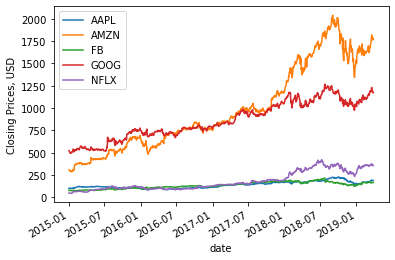

In [52]:
# Plot portfolio's asset prices during this time
import matplotlib.pyplot as plt
df.plot().set_ylabel("Closing Prices, USD")
plt.show()

In [53]:
weights = [0.25, 0.25, 0.25, 0.25, 0.25]
# Compute the portfolio's daily returns
asset_returns = df.pct_change()
portfolio_returns = asset_returns.dot(weights)

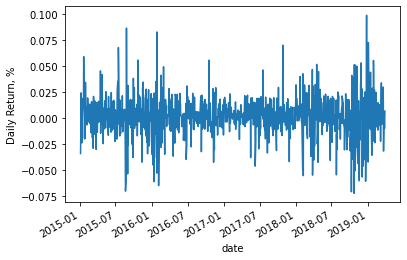

In [54]:
# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

### Asset covariance and portfolio volatility

Assess the riskiness of the portfolio using the covariance matrix to determine the portfolio's volatility.

> First compute the covariance between the asset_returns identify which company had the highest volatility;
> Then given the weights of an equal-weighted portfolio, find the portfolio's annualized volatility for that period using portfolio_returns;
> Finally use a 30-day window to create a time series of the volatility

In [55]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()
# Annualize the covariance using 252 trading days per year
covariance = covariance * 252
# Display the covariance matrix
#Which portfolio asset has the highest annualized volatility over the time period
print(covariance)

          AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.063118  0.037599  0.032926  0.031483  0.039957
AMZN  0.037599  0.093749  0.049486  0.048395  0.063560
FB    0.032926  0.049486  0.082483  0.041922  0.049808
GOOG  0.031483  0.048395  0.041922  0.057460  0.049559
NFLX  0.039957  0.063560  0.049808  0.049559  0.185543


In [56]:
# Compute and display portfolio volatility for 2015 - 2016
portfolio_variance = np.transpose(weights)@covariance@weights
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

0.29280364151430394


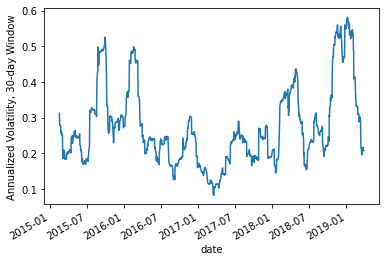

In [57]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

### Frequency resampling primer
Risk factor models often rely upon data that is of different frequencies

Pandas objects has a built-in .resample() method that specifies the lower frequency. 


In [58]:
# Convert daily returns to quarterly average returns
returns = df.pct_change()
returns_q = returns.resample('Q').mean()
#returns_q = returns.resample('Q').mean().dropna()
# Examine the beginning of the quarterly series
print(returns_q.head())

# convert daily returns to weekly minimum returns
returns_w = returns.resample('W').min().dropna()
#returns_w = returns.resample('W').min()
# Examine the beginning of the weekly series
print(returns_w.head())

                AAPL      AMZN        FB      GOOG      NFLX
date                                                        
2015-03-31  0.002375  0.003366  0.000881  0.000821  0.003378
2015-06-30  0.000256  0.002661  0.000758 -0.000759  0.007590
2015-09-30 -0.001708  0.002852  0.000952  0.002826  0.002293
2015-12-31 -0.000544  0.004491  0.002496  0.003572  0.001990
2016-03-31  0.000839 -0.001744  0.001789 -0.000163 -0.001309
                AAPL      AMZN        FB      GOOG      NFLX
date                                                        
2015-01-11 -0.028171 -0.022833 -0.016061 -0.023177 -0.050896
2015-01-18 -0.027140 -0.021550 -0.029234 -0.007296 -0.031766
2015-01-25  0.005161 -0.004471  0.002318 -0.002322  0.021041
2015-02-01 -0.035013 -0.009397 -0.026795 -0.030978 -0.025784
2015-02-08 -0.008422 -0.002524 -0.015142 -0.012244 -0.017967


# Modern Portfolio Theory — (MPT)

Basics of the Model
* Portfolio Expected Return- The expected return of a portfolio is calculated by multiplying the weight of the asset by its return and summing the values of all the assets together.
* Portfolio Variance - Portfolio variance is used as the measure of risk in this model. 
* Sharpe Ratio - The Sharpe ratio measures the return of an investment in relation to the risk-free rate (Treasury rate) and its risk profile. 
* The Efficient Frontier - Measure risk vs returns and is used to select the most optimum portfolio to invest into after considering the risk profile and the characteristics of the investor. The efficient frontier is essential the part of the curve in the first and second quadrants depending on the objective and investor ability/characteristics. The Capital Allocation Line (CAL) is essentially a tangent to the efficient frontier. The point of intersection between the tangent and the frontier is considered to be the optimal investment which has maximum returns for a given risk profile, under normal conditions



## pypfopt (PyPortfolioOpt) library : returns


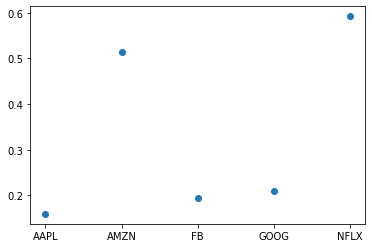

In [59]:
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(df, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

## pypfopt (PyPortfolioOpt) library : covariance


In [60]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs =CovarianceShrinkage(df)

# Compute the sample covariance matrix of returns
sample_cov = df.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.063118  0.037599  0.032926  0.031483  0.039957
AMZN  0.037599  0.093749  0.049486  0.048395  0.063560
FB    0.032926  0.049486  0.082483  0.041922  0.049808
GOOG  0.031483  0.048395  0.041922  0.057460  0.049559
NFLX  0.039957  0.063560  0.049808  0.049559  0.185543 

Efficient Covariance Matrix
           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.063731  0.036806  0.032231  0.030819  0.039114
AMZN  0.036806  0.093716  0.048442  0.047374  0.062219
FB    0.032231  0.048442  0.082688  0.041038  0.048757
GOOG  0.030819  0.047374  0.041038  0.058192  0.048513
NFLX  0.039114  0.062219  0.048757  0.048513  0.183573 



## Efficient frontier

OrderedDict([('AAPL', 0.4040234391054189), ('AMZN', 0.007261628308447887), ('FB', 0.15252518147736677), ('GOOG', 0.4361897511087664), ('NFLX', 0.0)])


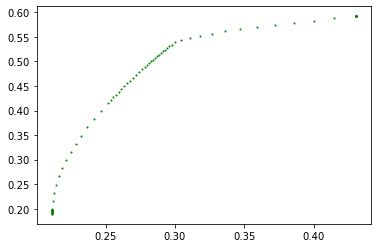

In [61]:
 from pypfopt.cla import CLA

# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(mean_returns,sample_cov)

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()


plt.scatter(vol, ret, s = 4, c = 'g', marker = '.')
#plt.legend()
plt.show()

# Breaking down the risk
Break down this period into three epochs: 2015-2016 (before), 2017-2018 (during) and 2019 (after). For each period, compute the efficient covariance matrix, and compare them to each other.


In [62]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2015', 'end': '31-12-2016'},
           'during' : {'start': '1-1-2017', 'end': '31-12-2018'},
           'after'  : {'start': '1-1-2019', 'end': '31-12-2019'}
         }

# Compute the efficient covariance for each epoch
epochs_cov = {}
epochs_returns={}
for x in epochs.keys():
  sub_price = df.loc[epochs[x]['start']:epochs[x]['end']]
  epochs_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
  epochs_returns[x] = mean_historical_return(sub_price, frequency = 252) 
# Display the efficient covariance matrices for all epochs
print("Mean returns Matrices\n", epochs_returns)
print("Efficient Covariance Matrices\n", epochs_cov)

Mean returns Matrices
 {'before': AAPL    0.049569
AMZN    0.560396
FB      0.211469
GOOG    0.213175
NFLX    0.577346
dtype: float64, 'during': AAPL    0.184676
AMZN    0.414610
FB      0.059501
GOOG    0.148700
NFLX    0.452172
dtype: float64, 'after': AAPL    1.211348
AMZN    0.844914
FB      1.373852
GOOG    0.620922
NFLX    2.335081
dtype: float64}
Efficient Covariance Matrices
 {'before':           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.065136  0.026898  0.028855  0.024455  0.031196
AMZN  0.026898  0.100962  0.043899  0.044377  0.050276
FB    0.028855  0.043899  0.074869  0.037591  0.041845
GOOG  0.024455  0.044377  0.037591  0.065811  0.042719
NFLX  0.031196  0.050276  0.041845  0.042719  0.221128, 'during':           AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.058822  0.042577  0.031933  0.033216  0.043893
AMZN  0.042577  0.086963  0.049817  0.047330  0.070400
FB    0.031933  0.049817  0.086987  0.041333  0.053155
GOOG  0.033216  0.047330  0.041333  0.052

OrderedDict([('AAPL', 0.400932842796711), ('AMZN', 0.0), ('FB', 0.12608593792383851), ('GOOG', 0.4729812192794505), ('NFLX', 0.0)])
OrderedDict([('AAPL', 0.39855677021458563), ('AMZN', 0.07773440686466845), ('FB', 0.1917619662664423), ('GOOG', 0.3135630844705279), ('NFLX', 0.018383772183775914)])
OrderedDict([('AAPL', 0.15427987122613204), ('AMZN', 0.1486929618532428), ('FB', 0.1683760713092236), ('GOOG', 0.4608094044880169), ('NFLX', 0.06784169112338466)])


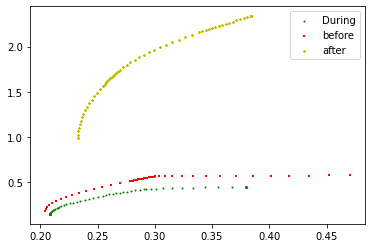

In [63]:
# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(epochs_returns['during'], epochs_cov['during'])
efficient_portfolio_before = CLA(epochs_returns['before'], epochs_cov['before'])
efficient_portfolio_after = CLA(epochs_returns['after'], epochs_cov['after'])

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())
print(efficient_portfolio_before.min_volatility())
print(efficient_portfolio_after.min_volatility())
# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()
(retb, volb, weightsb) = efficient_portfolio_before.efficient_frontier()
(reta, vola, weightsa) = efficient_portfolio_after.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.scatter(volb, retb, s = 4, c = 'r', marker = '+', label = 'before')
plt.scatter(vola, reta, s = 4, c = 'y', marker = '*', label = 'after')
plt.legend()
plt.show()

# Portfolio weight: maximum Sharpe ratio 

In [64]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
#Max Sharpe Ratio - Tangent to the EF
#Annualized Return
mu = mean_historical_return(df)
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df)
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)
                      ) #weight bounds in negative allows shorting of stocks

sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
optimal_weights = ef.clean_weights()
# Display the optimal weights
print(optimal_weights)

OrderedDict([('AAPL', -0.06989), ('AMZN', 1.0), ('FB', -0.18335), ('GOOG', -0.2161), ('NFLX', 0.46934)])


In [65]:
# Initialize the efficient portfolio dictionary
ef_dict = {}
# Initialize the dictionary of optimal weights
optimal_weights_dict = {}

# For each epoch, assign an efficient frontier instance to ef
for x in ['before', 'during', 'after']: 
    ef_dict[x] = EfficientFrontier(epochs_returns[x], epochs_cov[x], weight_bounds=(-1,1))
    sharpe_pfolio[x]=ef_dict[x].max_sharpe()
    optimal_weights_dict[x] = ef_dict[x].clean_weights()

In [66]:
print(optimal_weights_dict)

{'before': OrderedDict([('AAPL', -0.3315), ('AMZN', 1.0), ('FB', 0.00706), ('GOOG', -0.059), ('NFLX', 0.38344)]), 'during': OrderedDict([('AAPL', 0.27904), ('AMZN', 1.0), ('FB', -0.62326), ('GOOG', -0.25939), ('NFLX', 0.6036)]), 'after': OrderedDict([('AAPL', 0.43135), ('AMZN', -0.29838), ('FB', 0.48572), ('GOOG', -0.52687), ('NFLX', 0.90818)])}


In [67]:
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy, also bounds for shorting will affect allocation
#Min Volatility Portfolio Allocation $10000
from pypfopt.discrete_allocation import get_latest_prices, DiscreteAllocation
latest_prices = get_latest_prices(df)
allocation_minv, rem_minv = DiscreteAllocation(optimal_weights, latest_prices,total_portfolio_value=10000).lp_portfolio()
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

{'AMZN': 4, 'NFLX': 8, 'AAPL': -3, 'FB': -7, 'GOOG': -1}
Leftover Fund value in$ after building minimum volatility portfolio is $116.72


# Monte Carlo simulations

* Historical simulation: use past to predict future; No distributional assumption required; Data about previous losses become simulated losses for tomorrow

* Monte Carlo simulation: powerful combination of parametric estimation and simulation

In [71]:
# Historical simulation
weights = [0.25, 0.25, 0.25, 0.25, 0.25]
portfolio_returns = asset_returns.dot(weights)
losses = - portfolio_returns
VaR_95 = np.quantile(losses, 0.95)


In [72]:
# Monte Carlo simulation with asset return simulation
# Initialize daily cumulative loss for the assets, across N runs
mu = portfolio_losses.mean()
sigma = portfolio_losses.std()

from scipy.stats import norm
total_steps = 1440 # 1day, 1440 mins
N = 10000

# Compute the efficient covariance matrix of returns
#e_cov = cs.ledoit_wolf()
daily_loss = np.zeros((5,N))

# Create the Monte Carlo simulations for N runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = e_cov@norm.rvs(size = (5,total_steps)) #this ecov come from Practice with PyPortfolioOpt: covariance
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = mu * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)
    
# Generate the 95% VaR estimate
weights = [0.25, 0.25, 0.25, 0.25, 0.25]

losses = weights@ daily_loss
print("Monte Carlo VaR_95 estimate: ", np.quantile(losses, 0.95))    

Monte Carlo VaR_95 estimate:  0.25127771174168223
